## Attribute Relationships

In this section we will further examine the relationships between attributes that was begun in the Data Visualization section.

In [27]:
#import dataset#import 
import pandas as pd
import numpy as np
df_train = pd.read_csv('DMProj1/train.csv')
df_resources = pd.read_csv('DMProj1/resources.csv')
df_resources['Total_cost'] = df_resources.quantity * df_resources.price
train_resource = pd.merge(df_train, df_resources, on="id", how='left')
#https://www.kaggle.com/codename007/a-very-extensive-end-to-end-project-donorschoose
## Merging with train and test data ##
train_resource = pd.merge(df_train, df_resources, on="id", how='left')
t2 = train_resource.pivot_table(index = ['id', 'description'],
                                values='quantity', 
                                aggfunc=np.sum)
t2.reset_index(inplace=True)
train_resource = pd.merge(train_resource,
                          t2, 
                          on=['id', 'description'], 
                          how='right',
                          suffixes=('_Orig', '_True'))

Total_cost = train_resource.pivot_table(values=['Total_cost','quantity'],
                                        index='id',
                                        aggfunc={'Total_cost' : np.sum, 'quantity' : np.sum})
Total_cost.reset_index(level=0, inplace = True)

df_train = df_train.merge(Total_cost, on='id', how='left')
df_train['Average_item_cost'] = df_train.Total_cost  / df_train.quantity
#df_train.info()

KeyError: 'quantity'

Let's take a look at the continuous variables in a scatter matrix to get a first look at the relationships between them.

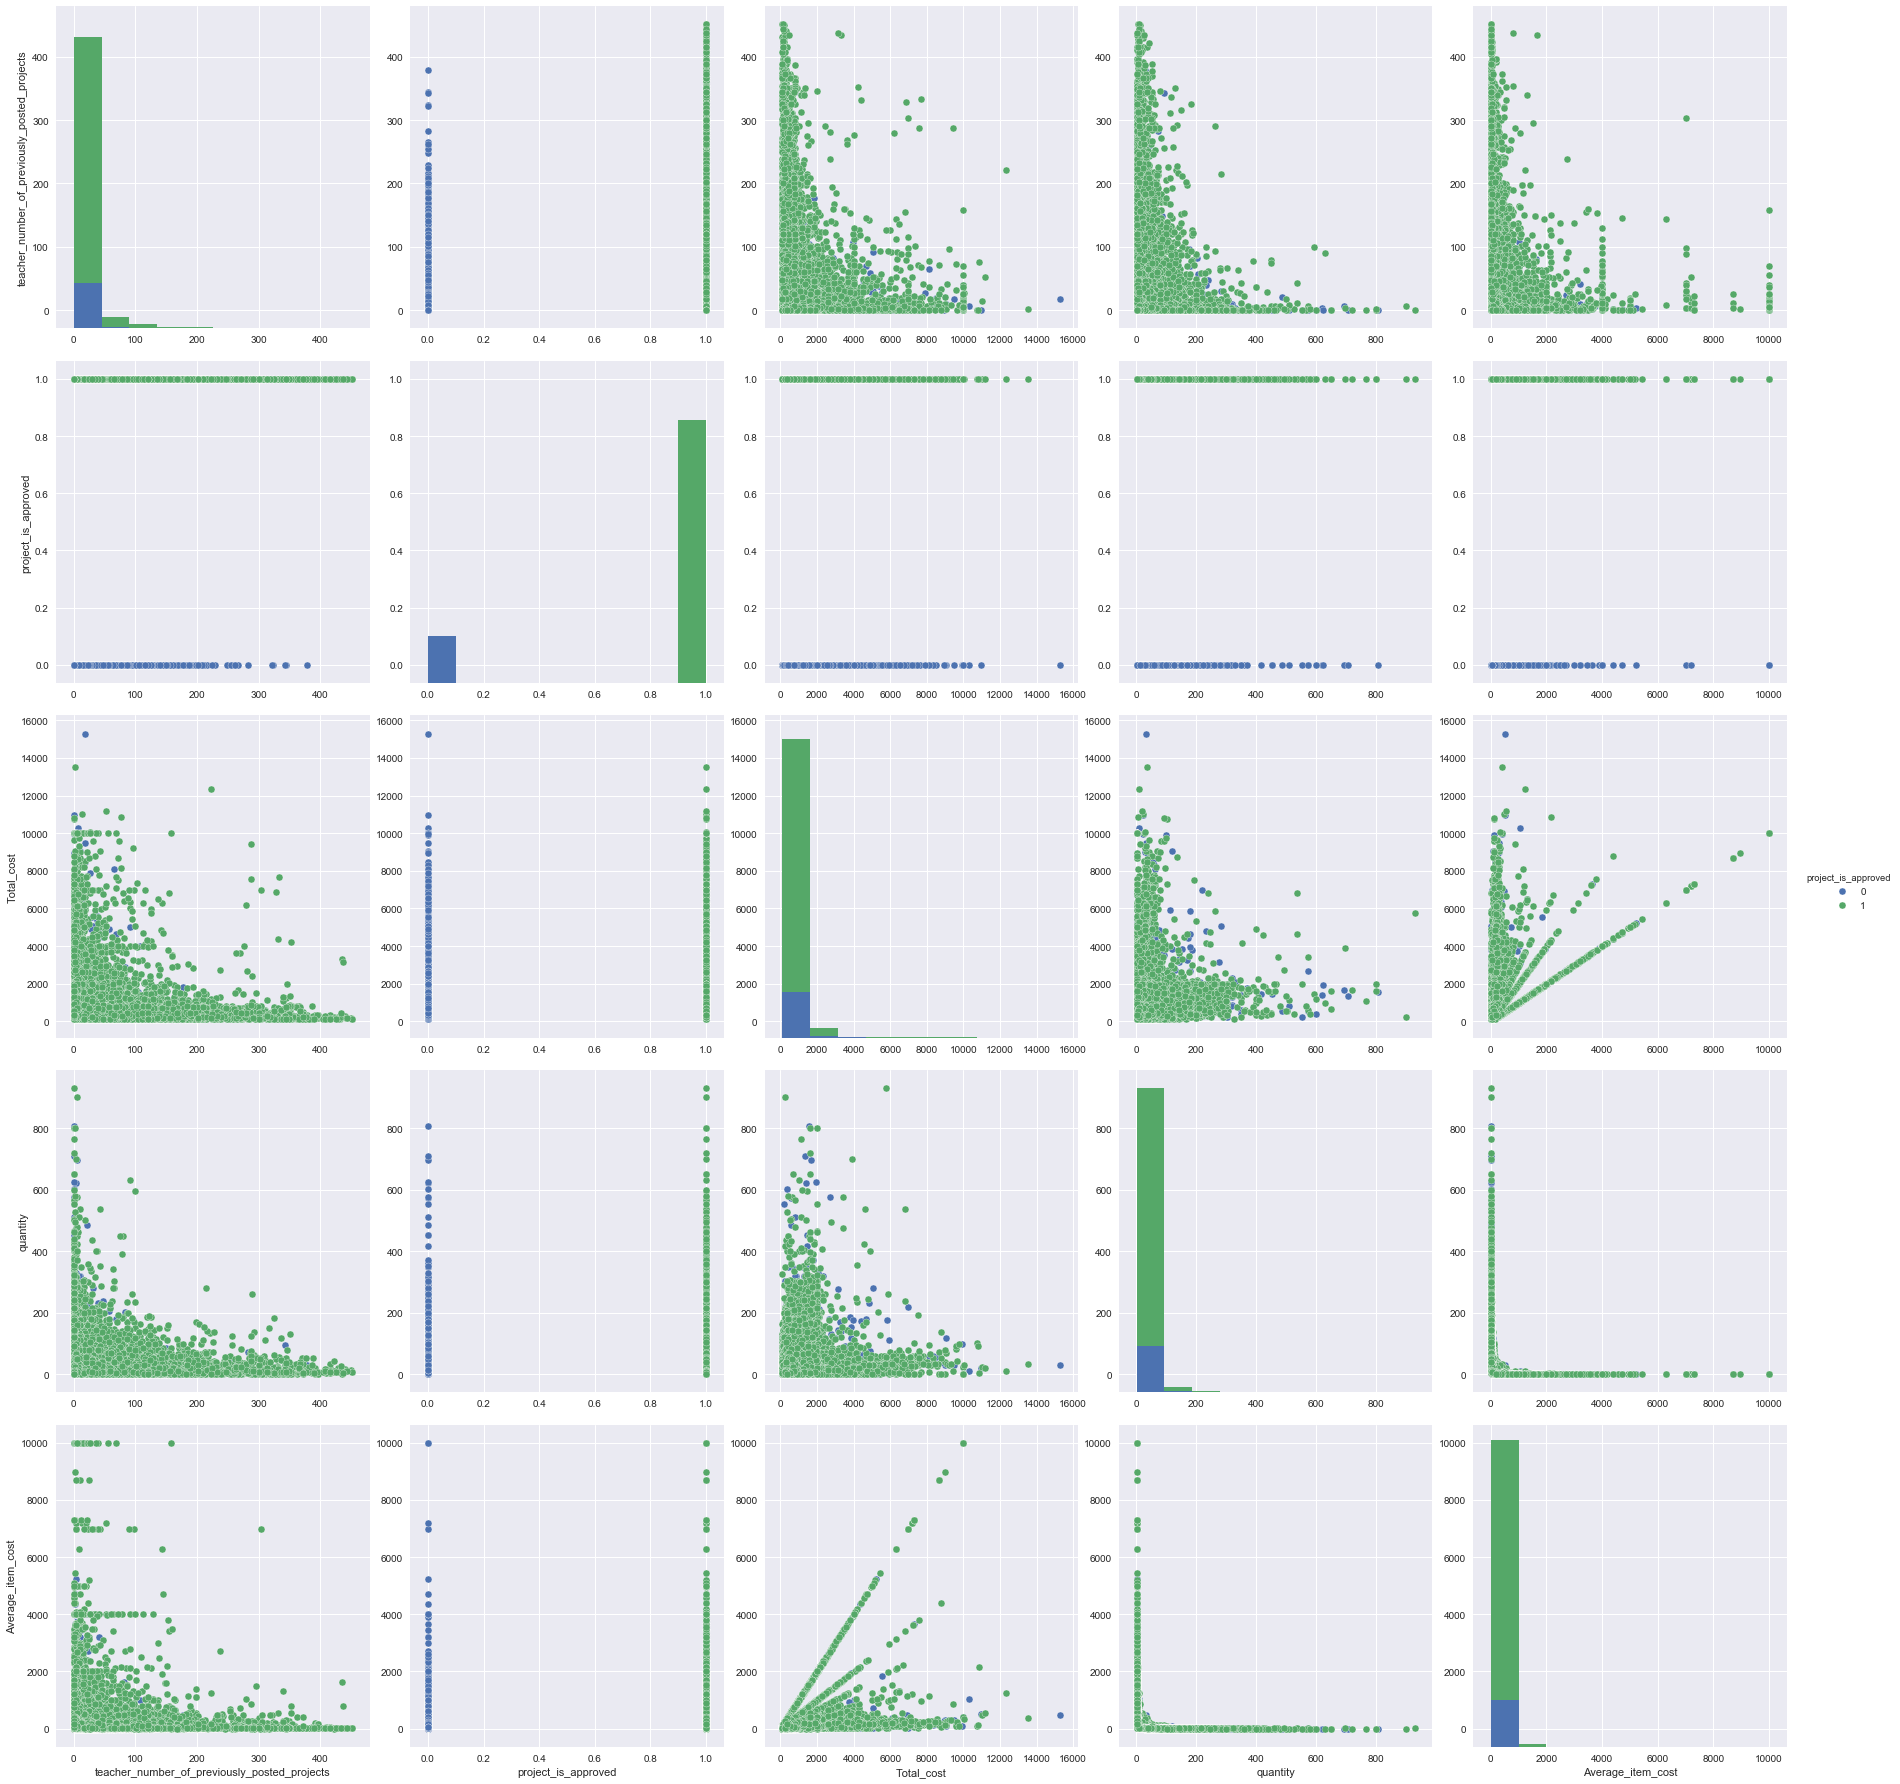

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

sns.pairplot(df_train,hue="project_is_approved", diag_kind = 'hist', size=5)
plt.show()

The first detail we'll pay attention to is what appears to be an extreme right skew for quantity, total cost, and the number of previously submitted projects.  This can be seen along the diagonal of the scatter plot above.  Since all of these attributes have the same general skew, the plots between variables exibits a similar skew.  

Let's take a closer look at quantity and total cost.

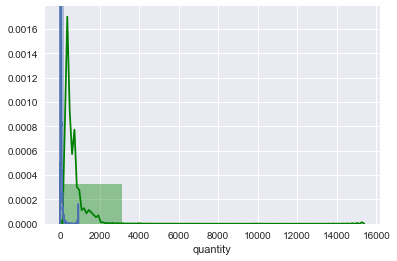

In [24]:
sns.distplot(df_train["Total_cost"], bins=5, kde=True, color='green')
sns.distplot(df_train["quantity"], bins=5, kde=True)
plt.show()

The chart above shows quantity and total cost in a kernal density plot.  The right skew is so extreme that it is difficult to differentiate between the two.

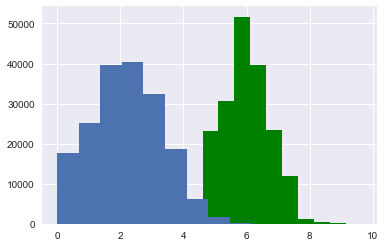

In [25]:
df_train["Total_cost"].apply(np.log).hist(color='green')
df_train["quantity"].apply(np.log).hist()
plt.show()

The histogram above shows the same two attributes, quantity and total cost - but with a log transform.  The log transform seems to greatly improve the distributions of the histogram.  They both appear fairly normal now and it is easy to differentiate between the two.

Let's do the same analysis for previously submitted projects.

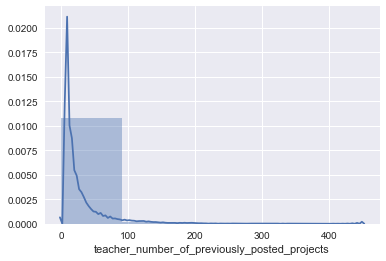

In [7]:
sns.distplot(df_train["teacher_number_of_previously_posted_projects"], bins=5, kde=True)
plt.show()

The above kernal density plot for number of previously posted projects exihits a similar skew as was seen for quantity and total cost.  Again, we will perform a log transform on this attribute to see if this helps to normalize the distributions.

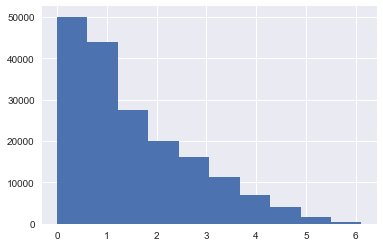

In [18]:
number = df_train["teacher_number_of_previously_posted_projects"]+1
number.apply(np.log).hist()
plt.show()

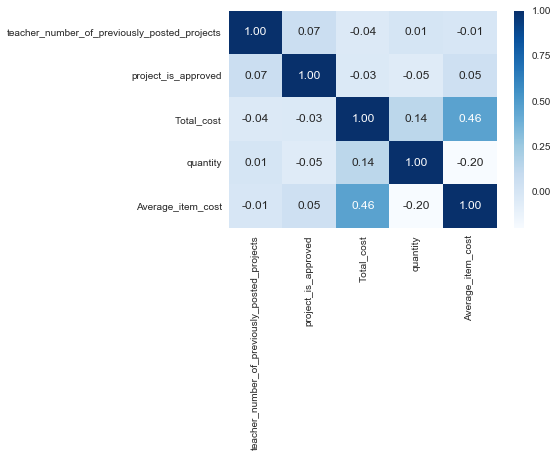

In [26]:
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap = 'Blues')
plt.show()